In [2]:
from sympy import *
init_printing()
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h,lf,lg = symbols('f g h lf lg', cls=Function)

In [3]:
import numpy as np
from scipy.optimize import bisect
from scipy.stats import norm
from scipy.stats import ncx2
from scipy.integrate import quad
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

In [3]:
s1, s2, l1, l2,r1,r2,v1,v2,r,m1,m2,nm1,nm2,ns1,ns2,d,c1,c2,mvg,nu,tt,svg,e1,e2,e3,e4 = symbols('s1 s2 l1 l2 r1 r2 v1 v2 r m1 m2 nm1 nm2 ns1 ns2 d c1 c2 mvg nu tt svg,e1,e2,e3,e4')

In [4]:
#eqnsvg=[e1-(mvg+tt*nu),e2-nu*(tt**2+svg**2),e3-(2*tt**3+3*svg**2*tt)/(sqrt(nu)*(3*tt*svg**2)),e4-(3+3*svg**4/(nu*(tt**2*(1+nu**2)+svg**4)))]
#slnvg=solve(eqnsvg,mvg,tt,nu,svg,dict=True)

In [5]:
def fun(x):
    return [x[0] + 0.5 * x[1] - 1.0,
            0.5 * (x[1] - x[0]) ** 2]

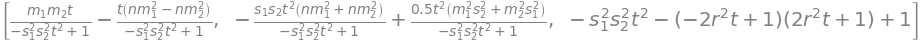

In [6]:
chfpr=exp(1/2*(t**2*((m1*s2)**2+(m2*s1)**2)+2*m1*m2*t)/((1-(s1*s2*t)**2)))/sqrt(1-(s1*s2*t)**2)
#chfnc=exp(t*(nm1-nm2)**2/(1-ns1**2*t)-t*(nm1+nm2)**2/(1+ns2**2*t))/sqrt((1-ns1**2*t)*(1+ns2**2*t))
#chfnc=exp(t*((nm1+nm2)/2)**2/(1-2*r**2/4*t)-t*((nm1-nm2)/2)**2/(1+2*r**2/4*t))/sqrt((1-2*r**2/4*t)*(1+2*r**2/4*t))
chfnc=exp(t*(nm1**2/(1-2*r**2*t))-t*(nm2**2/(1+2*r**2*t)))/sqrt((1-2*r**2*t)*(1+2*r**2*t))
#eqncnocor=[m1*s2**2+m2**s1**2-r**2*(nm1**2+nm2**2),4*m1*m2-nm1*nm2,r**2-s1*s2]
nomcfpr=1-(s1*s2*t)**2
#denomcfpr=1/2*(t**2*((m1*s2)**2+(m2*s1)**2)+2*m1*m2*t)/((1-(s1*s2*t)**2))
denomcfpr=1/2*(t**2*((m1*s2)**2+(m2*s1)**2)+2*m1*m2*t)/((1-(s1*s2*t)**2))
#denomcfnc=t*((nm1+nm2)/2)**2/(1-2*r**2/4*t)-t*((nm1-nm2)/2)**2/(1+2*r**2/4*t)
denomcfnc=t*(nm1**2/(1-2*r**2*t))-t*(nm2**2/(1+2*r**2*t))
denomcfnc1=t*(nm1**2-nm2**2)/(1-(s1*s2*t)**2)
denomcfnc2=t**2*(nm2**2+nm1**2)*(s1*s2)/(1-(s1*s2*t)**2)
denomcfpr1=(m1*m2*t)/(1-(s1*s2*t)**2)
denomcfpr2=1/2*(t**2*((m1*s2)**2+(m2*s1)**2))/(1-(s1*s2*t)**2)
#nomcfnc=(1-2*r**2/4*t)*(1+2*r**2/4*t)
nomcfnc=(1-2*r**2*t)*(1+2*r**2*t)
eqns=[denomcfpr1-denomcfnc1,denomcfpr2-denomcfnc2,nomcfpr-nomcfnc]
#[denomcfpr1-denomcfnc1,denomcfpr2-denomcfnc2]
eqns

In [7]:
#B=(m1**2*s2**2+m2*s1**2)/(s1*s2)+8*m1*m2
#r=sqrt(s1*s2)
#nm2=(-sqrt(B)+sqrt(B-16*m1*m2))/2
#nm1=sqrt(B-nm2)
soln=solve(eqns,nm1,nm2,r,dict=True)

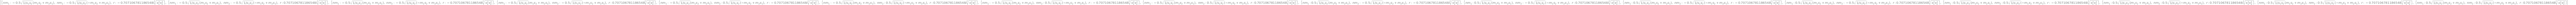

In [8]:
soln

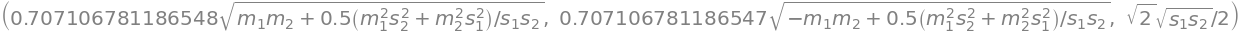

In [9]:
nm1=sqrt(1/2*(m1*m2+1/2*((m1**2*s2**2+m2**2*s1**2)/(s1*s2))))
nm2=sqrt(nm1**2-m1*m2)
r=sqrt(s1*s2/2)
(nm1,nm2,r)

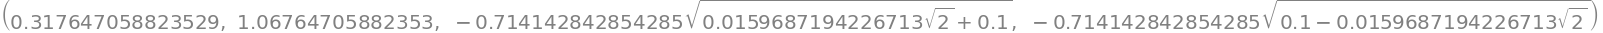

In [10]:
eqnsrho=[m1*m2-l1+l2,(m1**2*s2**2+m2**2*s1**2-2*r*m1*m2*s1*s2)-4*r1**2*l2-4*r2**2*l1,r*s1*s2-r1**2+r2**2,(s1*s2)**2*(1-r**2)-4*r1**2*r2**2]
sln2=solve(eqnsrho,l1,l2,r1,r2,dict=True)
sln2

mm1=-1.5;ss1=1.02;mm2=0.5;ss2=0.1;rr=0.1

j=4
(sln2[j][l1].subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)]),sln2[j][l2].subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)]),sln2[j][r1].subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)]),\
 sln2[j][r2].subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)]))



#(sln2[0][l1],sln2[0][l2],sln2[0][r1],sln2[0][r2])

In [11]:
eqnsrho=[m1*m2-l1+l2,(m1**2*s2**2+m2**2*s1**2-2*r*m1*m2*s1*s2)-4*r1**2*l2-4*r2**2*l1,r*s1*s2-r1**2+r2**2,(s1*s2)**2*(1-r**2)-4*r1**2*r2**2]
print(latex(eqnsrho))

\left[ - l_{1} + l_{2} + m_{1} m_{2}, \  - 4 l_{1} r_{2}^{2} - 4 l_{2} r_{1}^{2} + m_{1}^{2} s_{2}^{2} - \sqrt{2} m_{1} m_{2} s_{1} s_{2} \sqrt{s_{1} s_{2}} + m_{2}^{2} s_{1}^{2}, \  - r_{1}^{2} + r_{2}^{2} + \frac{\sqrt{2} s_{1} s_{2} \sqrt{s_{1} s_{2}}}{2}, \  - 4 r_{1}^{2} r_{2}^{2} + s_{1}^{2} s_{2}^{2} \left(- \frac{s_{1} s_{2}}{2} + 1\right)\right]


In [12]:
chrfuncorrprd=exp(((1/2*t**2*(m1**2*s2**2+m2**2*s1**2-2*r*m1*m2*s1*s2)+m1*m2*t)/((1-(1+r)*s1*s2*t)*(1+(1-r)*(s1*s2)*t))))/sqrt(((1-(1+r)*s1*s2*t)*(1+(1-r)*(s1*s2)*t)))

In [13]:
mm1=-1.5;ss1=1.02;mm2=0.5;ss2=0.1;rr=0.1

r2=sqrt(s1*s2*(1-r)/2)
r1=sqrt(r*s1*s2+r2**2)
rv1,rv2=r2.subs([(s1,ss1),(s2,ss2),(r,rr)]),r1.subs([(s1,ss1),(s2,ss2),(r,rr)])
l1=((m1**2*s2**2+m2**2*s1**2-2*r*m1*m2*s1*s2)+4*m1*m2*r1**2)/(4*r1**2+4*r2**2)
l2=l1-m1*m2
ll1,ll2=l1.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)]),l2.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)])
ll1.evalf(),ll2.evalf(),rv1.evalf(),rv2.evalf()

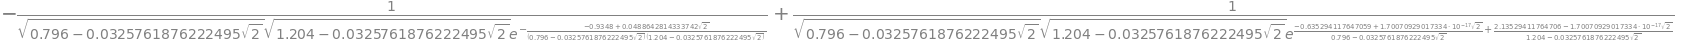

In [14]:

chrfuncorrnchi=exp(l1*t/(1-2*r1**2*t)-l2*t/(1+2*r2**2*t))/sqrt((1-2*r1**2*t)*(1+2*r2**2*t))
chrfuncorrnchi
denom=expand(simplify(l1*t/(1-2*r1**2*t)-l2*t/(1+2*r2**2*t)))
denom.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(l1,l1.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)])),(l2,l2.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr)])),(t,1),(r,rr)])
chrfuncorrnchi.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(l1,ll1.evalf()),(l2,ll2.evalf()),(r1,rv1.evalf()),(r2,rv2.evalf()),(t,2),(r,rr)])-chrfuncorrprd.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(r,rr),(t,2)])


In [15]:
from sympy import latex
#print(latex(chrfuncorrnchi))
print(latex((l1))+',')
print(latex(l2)+',')
print(latex(r1)+',')
print(latex(r2))

\frac{m_{1}^{2} s_{2}^{2} - \sqrt{2} m_{1} m_{2} s_{1} s_{2} \sqrt{s_{1} s_{2}} + 4 m_{1} m_{2} \left(\frac{\sqrt{2} s_{1} s_{2} \sqrt{s_{1} s_{2}}}{2} + \frac{s_{1} s_{2} \left(- \frac{\sqrt{2} \sqrt{s_{1} s_{2}}}{2} + 1\right)}{2}\right) + m_{2}^{2} s_{1}^{2}}{2 \sqrt{2} s_{1} s_{2} \sqrt{s_{1} s_{2}} + 4 s_{1} s_{2} \left(- \frac{\sqrt{2} \sqrt{s_{1} s_{2}}}{2} + 1\right)},
- m_{1} m_{2} + \frac{m_{1}^{2} s_{2}^{2} - \sqrt{2} m_{1} m_{2} s_{1} s_{2} \sqrt{s_{1} s_{2}} + 4 m_{1} m_{2} \left(\frac{\sqrt{2} s_{1} s_{2} \sqrt{s_{1} s_{2}}}{2} + \frac{s_{1} s_{2} \left(- \frac{\sqrt{2} \sqrt{s_{1} s_{2}}}{2} + 1\right)}{2}\right) + m_{2}^{2} s_{1}^{2}}{2 \sqrt{2} s_{1} s_{2} \sqrt{s_{1} s_{2}} + 4 s_{1} s_{2} \left(- \frac{\sqrt{2} \sqrt{s_{1} s_{2}}}{2} + 1\right)},
\sqrt{\frac{\sqrt{2} s_{1} s_{2} \sqrt{s_{1} s_{2}}}{2} + \frac{s_{1} s_{2} \left(- \frac{\sqrt{2} \sqrt{s_{1} s_{2}}}{2} + 1\right)}{2}},
\frac{\sqrt{2} \sqrt{s_{1} s_{2} \left(- \frac{\sqrt{2} \sqrt{s_{1} s_{2}}}{2} + 1\ri

In [23]:
mm1=1.5;ss1=0.2;mm2=2.5;ss2=0.8
#nmm1=np.sqrt(1)*np.sqrt(1/(ss1*ss2))*(mm1*ss2+mm2*ss1)/2
#np.sqrt(2)*np.sqrt(1/(ss1*ss2))*(mm1*ss2+mm2*ss1)/2
#-0.5*np.sqrt(1/(ss1*ss2)*(mm1**2*ss2**2+mm2**2*ss1**2+4*mm1*mm2*ss1*ss2))
#np.sqrt(2)*np.sqrt(1/(ss1*ss2))*(mm1*ss2+mm2*ss1)/2
#nmm2=np.sqrt(1)*np.sqrt(1/(ss1*ss2))*(-mm1*ss2+mm2*ss1)/2
#np.sqrt(2)*np.sqrt(1/(ss1*ss2))*(-mm1*ss2+mm2*ss1)/2
#-0.5*np.sqrt(1/(ss1*ss2)*(mm1**2*ss2**2+mm2**2*ss1**2-4*mm1*mm2*ss1*ss2))
#nmm2=np.sqrt(2)*np.sqrt(1/(ss1*ss2))*(-mm1*ss2+mm2*ss1)/2
#nmm2=mm1*mm2/4
#nmm1=ss1*ss2*sqrt(nmm2**2+(mm1**2*ss2**2*ss1*ss2+2*mm1*mm2*ss1*ss2+mm2**2*ss1**2*ss1*ss2-nmm2**2*ss1**2*ss2**2))/(ss1**2*ss2**2)-nmm2/(ss1*ss2)
rm=np.sqrt(ss1*ss2/2)
nmm1=np.sqrt(0.5*(mm1*mm2+0.5*((mm1**2*ss2**2+mm2**2*ss1**2)/(ss1*ss2))))
nmm2=np.sqrt(nmm1**2-mm1*mm2)
print(nmm1);print(nmm2);print(rm)


2.125
0.875
0.28284271247461906


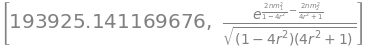

In [17]:
[chfpr.subs([(m1,mm1),(m2,mm2),(s1,ss1),(s2,ss2),(t,2)]),chfnc.subs([(nm1,nmm1),(nm2,nmm2),(r,rm),(t,2)])]

# Edgewoth for $\rho \neq 0$ case 

In [18]:
f=exp((1/2*t**2*(m1**2*s2**2+m2**2*s1**2-2*r*m1*m2*s1*s2)+m1*m2*t)/((1-(1+r)*s1*s2*t)*(1+(1-r)*(s1*s2)*t)))/sqrt(((1-(1+r)*s1*s2*t)*(1+(1-r)*(s1*s2)*t)))
lf=log(f)

In [19]:
simplify(lf.diff(t,1).subs(t,0))

In [20]:
simplify(lf.diff(t,2).subs(t,0))

In [21]:
simplify(lf.diff(t,3).subs(t,0))

In [22]:
print(latex(simplify(lf.diff(t,3).subs(t,0))))

3.0 \sqrt{2} m_{1}^{2} s_{2}^{2} \left(s_{1} s_{2}\right)^{\frac{3}{2}} + 3.0 m_{1} m_{2} s_{1}^{3} s_{2}^{3} + 6.0 m_{1} m_{2} s_{1}^{2} s_{2}^{2} + 3.0 \sqrt{2} m_{2}^{2} s_{1}^{2} \left(s_{1} s_{2}\right)^{\frac{3}{2}} + 0.5 \sqrt{2} \left(s_{1} s_{2}\right)^{\frac{9}{2}} + 3.0 \sqrt{2} \left(s_{1} s_{2}\right)^{\frac{7}{2}}


In [23]:
print(latex(simplify(lf.diff(t,4).subs(t,0))))

18.0 m_{1}^{2} s_{1}^{3} s_{2}^{5} + 12.0 m_{1}^{2} s_{1}^{2} s_{2}^{4} + 6.0 \sqrt{2} m_{1} m_{2} \left(s_{1} s_{2}\right)^{\frac{9}{2}} + 36.0 \sqrt{2} m_{1} m_{2} \left(s_{1} s_{2}\right)^{\frac{7}{2}} + 18.0 m_{2}^{2} s_{1}^{5} s_{2}^{3} + 12.0 m_{2}^{2} s_{1}^{4} s_{2}^{2} + 1.5 s_{1}^{6} s_{2}^{6} + 18.0 s_{1}^{5} s_{2}^{5} + 6.0 s_{1}^{4} s_{2}^{4}


In [24]:
simplify(lf.diff(t,5).subs(t,0))

# Using exact app. $\chi^{2}(x,\lambda)$ cdf

In [25]:
mm1=1.0;ss1=2.0;mm2=0.5;ss2=2.0;rr=0.0
rm=np.sqrt(ss1*ss2/2)
nmm1=np.sqrt(0.5*(mm1*mm2+0.5*((mm1**2*ss2**2+mm2**2*ss1**2)/(ss1*ss2))))
nmm2=np.sqrt(nmm1**2-mm1*mm2)
#nc=(nmm1-nmm2)**2/4.0
#f=lambda x,z,nmm1,nmm2,sgm:ncx2.pdf(x,1,float((nmm1-nmm2)**2/4),loc=0.0,scale=sgm/2)*ncx2.pdf(x+z,1,float((nmm1+nmm2)**2/4),loc=0.0,scale=sgm/2)
#cf=lambda x,z,nmm1,nmm2,sgm:ncx2.pdf(x,1,float((nmm1-nmm2)**2/4),loc=0.0,scale=sgm/2)*ncx2.cdf(x+z,1,float((nmm1+nmm2)**2/4),loc=0.0,scale=sgm/2)
cf=lambda x,z,nmm1,nmm2,sgm:ncx2.pdf(x,1,float((nmm2/rm)**2),loc=0.0,scale=sgm)*ncx2.cdf((x+z),1,float((nmm1/rm)**2),loc=0.0,scale=sgm)
f=lambda x,z,nmm1,nmm2,sgm:ncx2.pdf(x,1,float((nmm2/rm)**2),loc=0.0,scale=sgm)*ncx2.pdf(x+z,1,float((nmm1/rm)**2),loc=0.0,scale=sgm)
print(nmm1,nmm2,rm)

0.75 0.25 1.4142135623730951


# Using exact app. $\chi^{2}(x,\lambda)$ cdf in $\rho$ case

In [4]:
mm1=1.0;ss1=2.0;mm2=0.5;ss2=2.0;rr=0.5
rr2=np.sqrt(ss1*ss2*(1-rr)/2)
rr1=np.sqrt(rr*ss1*ss2+rr2**2)
ll1=((mm1**2*ss2**2+mm2**2*ss1**2-2*rr*mm1*mm2*ss1*ss2)+4*mm1*mm2*rr1**2)/(4*rr1**2+4*rr2**2)
ll2=ll1-mm1*mm2
cfcorr=lambda x,z,ll1,ll2,sgm1,sgm2:ncx2.pdf(x,1,((ll2/rr2**2)),loc=0.0,scale=sgm2)*ncx2.cdf((x+z),1,((ll1/rr1**2)),loc=0.0,scale=sgm1)
fcorr=lambda x,z,ll1,ll2,sgm1,sgm2:ncx2.pdf(x,1,((ll2/rr2**2)),loc=0.0,scale=sgm2)*ncx2.pdf(x+z,1,((ll1/rr1**2)),loc=0.0,scale=sgm1)
print(ll1,ll2,rr1,rr2)

0.5625000000000001 0.06250000000000011 1.7320508075688772 1.0


# Checking $\varphi(u)$ char.fun

In [27]:
echfpr=lambda u:np.exp(0.5*(-u**2*((mm1*ss2)**2+(mm2*ss1)**2)+2*mm1*mm2*1j*u)/((1-(ss1*ss2*1j*u)**2)))/np.sqrt(1-(ss1*ss2*1j*u)**2)
echfprcorr=lambda u:np.exp(0.5*(-u**2*((mm1*ss2)**2+(mm2*ss1)**2-2*rr*mm1*mm2*ss1*ss2)+2*mm1*mm2*1j*u)/((1-(1+rr)*ss1*ss2*1j*u)*(1+(1-rr)*(ss1*ss2)*1j*u)))/np.sqrt((1-(1+rr)*ss1*ss2*1j*u)*(1+(1-rr)*(ss1*ss2)*1j*u))
echfnc=lambda u:np.exp(1j*u*(nmm1**2/(1-2*rm**2*1j*u))-1j*u*(nmm2**2/(1+2*rm**2*1j*u)))/np.sqrt((1-2*rm**2*1j*u)*(1+2*rm**2*1j*u))
echrfncorr=lambda u:np.exp(ll1*1j*u/(1-2*rr1**2*1j*u)-ll2*1j*u/(1+2*rr2**2*1j*u))/np.sqrt((1-2*rr1**2*1j*u)*(1+2*rr2**2*1j*u))
print(echfpr(0.1))
print(echfnc(0.1))
print(echfprcorr(0.1))
print(echrfncorr(0.1))

(0.9078365132145322+0.03915513606472239j)
(0.9078365132145322+0.039155136064722394j)
(0.8743759105569233+0.18350067790157934j)
(0.8743759105569233+0.18350067790157928j)


# Using $\varphi(u)$ inversion for cdf

In [ ]:
xx=0.5
print(0.5-quad(lambda u:np.real(np.exp(-1j*u*xx)*echfnc(u)/(1j*u)),0.0,np.inf)[0]/np.pi)
print(0.5-quad(lambda u:np.real(np.exp(-1j*u*xx)*echfpr(u)/(1j*u)),0.0,np.inf)[0]/np.pi)
print(0.5-quad(lambda u:np.real(np.exp(-1j*u*xx)*echfprcorr(u)/(1j*u)),0.0,np.inf)[0]/np.pi)
print(0.5-quad(lambda u:np.real(np.exp(-1j*u*xx)*echrfncorr(u)/(1j*u)),0.0,np.inf)[0]/np.pi)

In [9]:
quad(cfcorr,0,np.inf,args=(0.05,ll1,ll2,rr1**2,rr2**2))[0]

# Truncated Gaussian Product $\mathcal{XY}$ Excluded Function

In [8]:
from scipy.special import kv
def NPCorr(x,m1,m2,s1,s2,r):
    A=np.exp(-0.5*m1**2/(s1**2*(1-r**2))-0.5*m2**2/(s2**2*(1-r**2))+m1*m2*r/(1-r**2))
    #A=1.
    f=1.0/np.sqrt(1.0-r**2)/(np.pi*s1*s2)*np.exp(x*r/((1.0-r**2)*(s1*s2)))*A*kv(0,np.abs(x)/((1.0-r**2)*(s1*s2)))
    return f

In [10]:
from scipy.optimize import minimize
z=1.;x=1.;
#mm1=1.0;ss1=2.0;mm2=0.5;ss2=1.0;rr=0.5
g=lambda x,z,rr:(x/(1-rr**2)*(mm1-rr*mm2/ss2)+z/(x*(1-rr**2))*(mm2-rr*mm1))
print("exponent of Aux is: %.4f" %(g(x,z,rr)))
print(mm1-rr*mm2/ss2,(mm2-rr*mm1))
print(mm1*ss2-mm2**2)
print(np.sqrt(mm1*ss2))
print(rr)
fg=lambda rr:quad(g,a=0.0,b=5.0,args=(z,rr))[0]
print(fg(rr))
#minimize(fg,x0=0.5)
#np.sqrt(mm1*ss2)
integC=quad(NPCorr,a=-19.65,b=75.,args=(mm1,mm2,ss1,ss2,rr))[0]
print(1.0/integC)

exponent of Aux is: 1.1667
0.875 0.0
1.75
1.4142135623730951
0.5
14.58333333333333
0.8825013788169102


In [ ]:
from numpy import cosh
z=4.
xx=0.5
#ff=lambda xx,z,l1,l2:np.exp(-(xx+l1**2+xx+z+l2**2)/2.)/np.sqrt(xx*(xx+z))*cosh(np.sqrt(l2*xx))*cosh(np.sqrt(l1*(xx+z)))/(2*np.pi)
nchix2=lambda x,l:(norm.pdf(np.sqrt(x)+np.sqrt(l))+norm.pdf(np.sqrt(x)-np.sqrt(l)))*0.5/np.sqrt(x)
cnchix2=lambda x,l:(norm.cdf(np.sqrt(x)+np.sqrt(l))+norm.cdf(np.sqrt(x)-np.sqrt(l))-1)
nrmprdnchi=lambda x,z,l1,l2,rm:nchix2(x/rm,l2)*nchix2((x+z)/rm,l1)/rm**2
crmprdnchi=lambda x,z,l1,l2,rm:nchix2(x/rm,l2)*cnchix2((x+z)/rm,l1)/rm

print(nrmprdnchi(xx,z,(nmm2/rm)**2,(nmm1/rm)**2,rm))
print(ncx2.cdf(xx+z,1,float((nmm2/rm)**2),loc=0.0,scale=rm))
print(cnchix2((xx+z)/rm,(nmm2/rm)**2))
#print(nchix2((xx+z)/rm,(nmm2/rm)**2)/rm)
print(quad(nrmprdnchi,0.0,np.inf,args=(z,(nmm1/rm)**2,(nmm2/rm)**2,rm**2))[0])
print(quad(f,0.0,np.inf,args=(z,(nmm1),(nmm2),rm**2))[0])
print(quad(cf,0.0,np.inf,args=(z,(nmm1),(nmm2),rm**2))[0])
quad(crmprdnchi, 0.0,np.inf,args=(z,(nmm1/rm)**2,(nmm2/rm)**2,rm**2))[0]

In [38]:
crmprdnchicorr=lambda x,z,ll1,ll2,sgm1,sgm2:nchix2(x/sgm2,ll2)*cnchix2((x+z)/sgm1,ll1)
nrmprdnchicorr=lambda x,z,ll1,ll2,sgm1,sgm2:nchix2(x/sgm2,ll2)*nchix2((x+z)/sgm1,ll1)/(sgm1*sgm2)
#/(sgm1*sgm2)
xz=3.5
print(quad(cfcorr,0,np.inf,args=(xz,ll1,ll2,rr1**2,rr2**2))[0])
print(quad(crmprdnchicorr, abs(xz),np.inf,args=(xz,(ll1/rr1**2),(ll2/rr2**2),rr1**2,rr2**2))[0])
print('pdfBYnchi_pdf',quad(fcorr,0,np.inf,args=(xz,ll1,ll2,rr1**2,rr2**2))[0])
print('pdfBYnorm_pdf',quad(nrmprdnchicorr, abs(xz),np.inf,args=(xz,(ll1/rr1**2),(ll2/rr2**2),rr1**2,rr2**2))[0])

0.7294720980916032
0.061033513054812756
pdfBYnchi_pdf 0.056058484301152345
pdfBYnorm_pdf 0.0015446990899960454


# Monte Carlo Simulation

In [34]:
bivr2=norm.rvs(loc=mm1,scale=ss1,size=100000)*norm.rvs(loc=mm2,scale=ss2,size=100000)
rvsv=bivr2
xmin=rvsv.min()
xmax=rvsv.max()
zz=np.linspace(xmin,xmax,100)
ecdf=ECDF(rvsv)
cdfsim=ecdf(zz)
print(rvsv.max())
print(rvsv.min())


47.98548907393988
-46.63255626408269


In [35]:
from scipy.stats import multivariate_normal as mvn
bivr=mvn.rvs([mm1,mm2],cov=[[ss1**2,rr*ss1*ss2],[rr*ss1*ss2,ss2**2]],size=100000)
rvsvcorr=bivr[:,0]*bivr[:,1]
xmincorr=rvsvcorr.min()
xmaxcorr=rvsvcorr.max()
zzcorr=np.linspace(xmincorr,xmaxcorr,100)
ecdfcor=ECDF(rvsvcorr)
cdfsimcorr=ecdfcor(zzcorr)
print(rvsvcorr.max())
print(rvsvcorr.min())

74.05367225040148
-20.326082365028235


# Integration part of Prod

## This is with $\rho=0$

In [36]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
zz=np.linspace(xmin,xmax,100)
ch=[quad(cf,0,np.inf,args=(z,nmm1,nmm2,rm**2))[0] for z in zz]
fch=[quad(f,0,np.inf,args=(z,nmm1,nmm2,rm**2))[0] for z in zz]

## This is with $\rho$

In [37]:
%matplotlib inline

zzcorr=np.linspace(xmincorr,xmaxcorr,100)
chcorr=[quad(cfcorr,0,np.inf,args=(z,ll1,ll2,rr1**2,rr2**2))[0] for z in zzcorr]
fchcorr=[quad(fcorr,0,np.inf,args=(z,ll1,ll2,rr1**2,rr2**2))[0] for z in zzcorr]

In [38]:
print(quad(cfcorr,0,np.inf,args=(0.05,ll1,ll2,rr1**2,rr2**2))[0])
ecdfcor(0.05)

0.33822902164366253


In [39]:
#plt.gcf().set_size_inches(8, 8)
%matplotlib qt
plt.subplot(2,2,1)
plt.plot(zz,ch,'--')
plt.plot(zz,cdfsim)
plt.legend(['$\chi^{2}(\lambda_{x},\lambda_{y},\sigma_{\chi^{2}})$','Simulation'])
plt.ylabel="$P(Z\leq z)"
plt.subplot(2,2,2)
#plt.plot(zz,np.concatenate(([0],np.diff(ch)/np.diff(zz))),'--') 
plt.plot(zz,fch,'--') 
#plt.hist(rvsv,density=True,bins=100)
sns.distplot(rvsv,kde=False,hist=True,norm_hist=True)
plt.legend(['$\chi^{2}(\lambda_{x},\lambda_{y},\sigma_{\chi^{2}})$','Simulation'])
plt.subplot(2,2,3)
plt.plot(zzcorr,chcorr,'--')
plt.plot(zzcorr,cdfsimcorr)
plt.legend([r'$\chi^{2}(\lambda_{x},\lambda_{y},\sigma_{x},\sigma_{y},\rho)$','Simulation'])
plt.subplot(2,2,4)
sns.distplot(rvsvcorr,kde=False,hist=True,norm_hist=True)
#sns.histplot(rvsvcorr,kde=False,stat='density')
plt.plot(zzcorr,fchcorr,'--',color='red') 
plt.legend([r'$\chi^{2}(\lambda_{x},\lambda_{y},\sigma_{x},\sigma_{y},\rho)$','Simulation'])
#plt.plot(zz,fch) 
path='C:/Users/aheki/Documents/cdo_model/cdopricer/poibinCDO/'
#plt.savefig(path+'Appr_exact_ncx2'+str(mm1)+str(mm2)+str(ss1)+str(ss2)+'.png')
#plt.savefig(path+'Appr_exact_ncx2'+str(mm1)+str(mm2)+str(ss1)+str(ss2)+'.eps')
#%%


In [40]:
#%matplotlib qt
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
'size': 12,
        }
plt.rcParams['text.usetex'] = False
plt.subplot(2,1,1)
plt.plot(zzcorr,chcorr,'--')
plt.plot(zzcorr,cdfsimcorr)
plt.legend([r'$\chi^{2}(\lambda_{x},\lambda_{y},\sigma_{x},\sigma_{y},\rho)$','Simulation'],prop={'family':font['family'], 'size':font['size']})
plt.xlabel('x',fontdict=font)
#plt.ylabel('F(x)')\
plt.subplot(2,1,2)
plt.plot(zzcorr,fchcorr,'--',color='orange') 
#plt.ylabel('$f(x)$',fontdict=font)
plt.xlabel('x',fontdict=font)
sns.histplot(rvsvcorr,kde=False,stat='density')
#plt.hist(rvsvcorr,density=True)
#plt.plot(zz,fch) 
plt.legend([r'$\chi^{2}(\lambda_{x},\lambda_{y},\sigma_{x},\sigma_{y},\rho)$','Simulation'],prop={'family':font['family'], 'size':font['size']})
path='C:/Users/aheki/Documents/cdo_model/cdopricer/poibinCDO/'
plt.savefig(path+'Appr_exact_ncx2'+str(mm1)+str(mm2)+str(ss1)+str(ss2)+'.png')
plt.savefig(path+'Appr_exact_ncx2'+str(mm1)+str(mm2)+str(ss1)+str(ss2)+'.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [41]:
cdfaprd=lambda zz:quad(cf,0.0,np.inf,args=(zz,nmm1,nmm2,rm**2))[0]
cdfaprdcorr=lambda zz:quad(cfcorr,0.0,np.inf,args=(zz,(ll1),ll2,rr1**2,rr2**2))[0]
pdfaprd=lambda zz:quad(f,0.0,np.inf,args=(zz,nmm1,nmm2,rm**2))[0]
#print(pdfaprd(z))
print(cdfaprd(0.05))
print(cdfaprdcorr(0.05))
print(ecdf(0.05))
print(ecdfcor(0.05))

0.4814789842071266
0.33822902164366253
0.4793700000000001
0.33834000000000003


In [42]:
plt.gcf().set_size_inches(12, 12)
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
xx=np.linspace(-20.,0,100)
pxx=np.linspace(0,20,100)
axx=np.linspace(-20.,20,200)
a=0.3842;b=0.7640;c=0.6964
#a=0.4920;b=0.2887;c=1.1893
erfapp=lambda x: np.exp(-a*x**2-b*x-c)
derfapp=lambda x: abs(-2*a*x-b)*np.exp(-a*x**2-b*x-c)
print(erfapp(0.1))
print(erfc(0.1/np.sqrt(2))*0.5)
print(norm.cdf(-0.1))
plt.subplot(3,1,1)
plt.plot(axx,np.concatenate((erfapp(-xx),1.0-erfapp(pxx))),'--');plt.plot(axx,norm.cdf(axx))
plt.subplot(3,1,2)
plt.plot(axx,np.concatenate((derfapp(-xx),derfapp(pxx))),'--');plt.plot(axx,norm.pdf(axx))
plt.subplot(3,1,3)
plt.plot(xx,derfapp(pxx),'--');plt.plot(xx,norm.pdf(-pxx))
print(derfapp(0.0))

0.4599479261172491
0.460172162722971
0.460172162722971
0.38075944172378273


# Edgeworth and VGamma Approximations   

In [43]:
def VGmomNP(mx,my,sx,sy,rho):
    delx=mx/sx;dely=my/sy
    
    K=6.0*(1+rho**4+2.0*delx**2+12.0*rho*delx*dely+4.0*rho**3*delx*dely+2.0*dely**2+6.0*rho**2*(1.0+delx**2+dely**2))/(1.0+rho**2+delx**2+dely**2+2.0*rho*delx*dely)**2+3.0
    
    S=2.0*(rho**3+3*delx*dely+3.0*rho**2*delx*dely+3.0*rho*(1.0+delx**2+dely**2))/(1+rho**2+delx**2+dely**2+2.0*rho*delx*dely)**(1.5)
    
    V=(sx*sy)**2*(1.0+rho**2+2.0*rho*delx*dely+delx**2+dely**2)
    
    E=(sx*sy)*(delx*dely+rho)
    #theta=(E*S**2)**(1./3.);
    #nu=E/theta;
    #sgm=V/nu;
    nu=3./(K-3.)
    sgm=np.sqrt(V*(K-3.)/3.)
    theta=S*np.sqrt(V)/3.
    mus=E-theta*nu
    return sgm,nu,theta,mus,K,S,V,E


def VGmomNPcorr(mx,my,sx,sy,rho):
    delx=mx/sx;dely=my/sy
    
    E=(sx*sy)*(delx*dely+rho)
    
    V=(sx*sy)**2*(1.0+rho**2+2.0*rho*delx*dely+delx**2+dely**2)
    #](1.0+rho**2+2.0*rho*delx*dely+delx**2+dely**2)
    #Exx=(1.0+rho**2+2.0*rho*delx*dely+delx**2+dely**2)
    
    K=6.0*(1+rho**4+2.0*delx**2+12.0*rho*delx*dely+4.0*rho**3*delx*dely+2.0*dely**2+6.0*rho**2*(1.0+delx**2+dely**2))/(1.0+rho**2+delx**2+dely**2+2.0*rho*delx*dely)**2+3.0
    #(12.0*(delx**2+dely**2)*(1.0+3.0*rho**2)+24.0*delx*dely*rho*(3.0+rho**2)+6.0*(1.0+6.0*rho+rho**4))/(1.0+rho**2+2.0*rho*delx*dely+delx**2+dely**2)**2+3.0
    #6.0*(1+rho**4+2.0*delx**2+12.0*rho*delx*dely+4.0*rho**3*delx*dely+2.0*dely**2+6.0*rho**2*(1.0+delx**2+dely**2))/(1.0+rho**2+delx**2+dely**2+2.0*rho*delx*dely)**2+3.0
    
    S=2.0*(rho**3+3*delx*dely+3.0*rho**2*delx*dely+3.0*rho*(1.0+delx**2+dely**2))/(1+rho**2+delx**2+dely**2+2.0*rho*delx*dely)**(1.5)
    #(6.0*((delx**2+dely**2)*rho+delx*dely*(1+rho**2))+6.0*rho+2.0*rho**3)/(1.0+rho**2+2.0*rho*delx*dely+delx**2+dely**2)**(1.5)
    #2.0*(rho**3+3*delx*dely+3.0*rho**2*delx*dely+3.0*rho*(1.0+delx**2+dely**2))/(1+rho**2+delx**2+dely**2+2.0*rho*delx*dely)**(1.5)
    
    
    #theta=(E*S**2)**(1./3.);
    #nu=E/theta;
    #sgm=V/nu;
    
    nu=3./(K-3.)
    sgm=np.sqrt(V*(K-3.)/3.)
    theta=S*np.sqrt(V)/3.
    mus=E-sx*sy*rho-theta*nu
    return sgm,nu,theta,mus,K,S,V,E

def VGddnew(x,sgm,nu,theta,mus,t):
    nu=t*nu
    f=(np.sqrt(2)/(np.sqrt(np.pi)*sgm*sc.special.gamma(nu)))*(np.abs(x-mus)/np.sqrt(theta**2+2*sgm**2))**(nu-0.5)*np.exp((x-mus)*theta/sgm**2)*sc.special.kv(nu-0.5,np.abs(x-mus)*np.sqrt(theta**2+2*sgm**2)/sgm**2)
    return f

def VGddnewCorr(x,sgm,nu,theta,mus,t):
    nu=t*nu
    f=1.0/np.sqrt(1.0-rho**2)/(np.sqrt(np.pi)*sgm*sc.special.gamma(nu))*(np.abs(x-mus)/np.sqrt((theta**2+2*sgm**2)*(1-rho**2)))**(nu-0.5)*np.exp((x-mus)*rho/(1.0-rho**2)*theta/sgm**2)*sc.special.kv(nu-0.5,np.abs(x-mus)/np.sqrt(1.0-rho**2)*np.sqrt(theta**2+2*sgm**2)/sgm**2)
    return f

def NPCorr(x,m1,m2,s1,s2,r):
    A=np.exp(-0.5*m1**2/(s1**2*(1-r**2))-0.5*m2**2/(s2**2*(1-r**2))+m1*m2*r/(1-r**2))
    #A=1.
    f=1.0/np.sqrt(1.0-r**2)/(np.pi*s1*s2)*np.exp(x*r/((1.0-r**2)*(s1*s2)))*A*sc.special.kv(0,np.abs(x)/((1.0-r**2)*(s1*s2)))
    return f


def GprodEdgeworth(xx, m1, m2, s1, s2, r):    
    K3=6.0*(s1*s2)**2*m1*m2
    mu=m1*m2
    sgm=np.sqrt((s1*s2)**2+m1**2*s2**2+m2**2*s1**2)
    x=(xx-mu)/sgm
    mom4val=(6.0*(s1*s2)**4+12.0*(s1*s2)**2*(m1**2*s2**2+m2**2*s1**2))/sgm**4
    mom5val=(120.0*(s1*s2)**4*m1*m2)/sgm**5
    mom6val=(120.0*(s1*s2)**6+360.0*(s1*s2)**4*(m1**2*s2**2+m2**2*s1**2))/sgm**6
    mom7val=(5040.0*(s1*s2)**6*m1*m2)/sgm**7
    extraterm=norm.pdf(x)*((mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x))
    #+mom5val*(-x**4+3*x**2-3.0)/120.0)
                           #(K3/sgm**3)**3/(216.0)*(-x**8+28*x**6-210*x**4+420*x**2-105.0))
                           #+mom6val*(x**5-10*x**3+15*x)/720.0+mom4val**2/576.0*(x**7-21*x**5+105*x**3-105.0*x)+mom7val*(-x**6+15*x**4-45*x**2+15.0)/5040)
    #(mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x)
    extratermpdf=norm.pdf(x)*(mom4val/24.0*(x**3-6*x**2+3.0)+(K3/sgm**3)**2/72.0*(x**6-15*x**4+45*x**2-15.0))
    out=norm.cdf(x)+(1.0-x**2)/6.0*norm.pdf(x)*(K3/sgm**3)-extraterm
    outpdf=norm.pdf(x)+(x**3-3.0*x)/6.0*norm.pdf(x)*(K3/sgm**3)
    #-extratermpdf
    return out,outpdf
def GprodEdgeworththird(xx, m1, m2, s1, s2, r):    
    K3=6.0*(s1*s2)**2*m1*m2
    mu=m1*m2
    sgm=np.sqrt((s1*s2)**2+m1**2*s2**2+m2**2*s1**2)
    x=(xx-mu)/sgm
    mom4val=(6.0*(s1*s2)**4+12.0*(s1*s2)**2*(m1**2*s2**2+m2**2*s1**2))/sgm**4
    mom5val=(120.0*(s1*s2)**4*m1*m2)/sgm**5
    extraterm=norm.pdf(x)*((mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x)+mom5val*(-x**4+3*x**2-3.0)/120.0)
    #(mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x)
    out=norm.cdf(x)+(1.0-x**2)/6.0*norm.pdf(x)*(K3/sgm**3)
    return out

def GprodEdgeworththirdCorr(xx, m1, m2, s1, s2, r):    
    K3=6.0*(s1*s2)**2*m1*m2+s1*s2*(6.0*m1**2*r*s2**2+6.0*m1*m2*r**2*s1*s2+6.0*m2**2*r*s1**2+2.0*r**3*s1**2*s2**2+6.0*r*s1**2*s2**2)
    mu=m1*m2+r*s1*s2
    sgm=np.sqrt((1+r**2)*(s1*s2)**2+m1**2*s2**2+m2**2*s1**2+2.0*m1*m2*s1*s2*r)
    x=(xx-mu)/sgm
    #mom4val=(6.0*(s1*s2)**4+8.0*(s1*s2)**2*(m1**2*s2**2+m2**2*s1**2))/sgm**4
    #mom5val=(120.0*(s1*s2)**4*m1*m2)/sgm**5
    #extraterm=norm.pdf(x)*((mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x)+mom5val*(-x**4+3*x**2-3.0)/120.0)
    #(mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x)
    out=norm.cdf(x)+(1.0-x**2)/6.0*norm.pdf(x)*(K3/sgm**3)
    return out

def GprodEdgeworthCorr(xx, m1, m2, s1, s2, r):    
    K3=6.0*(s1*s2)**2*m1*m2+s1*s2*(6.0*m1**2*r*s2**2+6.0*m1*m2*r**2*s1*s2+6.0*m2**2*r*s1**2+2.0*r**3*s1**2*s2**2+6.0*r*s1**2*s2**2)
    mu=m1*m2+r*s1*s2
    sgm=np.sqrt((1+r**2)*(s1*s2)**2+m1**2*s2**2+m2**2*s1**2+2.0*m1*m2*s1*s2*r)
    x=(xx-mu)/sgm
    mom4val=(s1*s2)**2*(36.0*m1**2*r**2*s2**2+36.0*m2**2*r**2*s1**2+36.0*r**2*(s1*s2)**2+6.0*(1+r**4)*(s1*s2)**2+12.0*(m1**2*s2**2+m2**2*s1**2)+24.0*m1*m2*s1*s2*r*(3.0+r**3))/sgm**4
    #mom5val=(120.0*(s1*s2)**4*m1*m2)/sgm**5
    #extraterm=norm.pdf(x)*((mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x)+mom5val*(-x**4+3*x**2-3.0)/120.0)
    #(mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x)
    extraterm=norm.pdf(x)*((mom4val)/24.0*(x**3-3.0*x)+((K3/sgm**3)**2/(72.0))*(x**5-10*x**3+15*x))
    out=norm.cdf(x)+(1.0-x**2)/6.0*norm.pdf(x)*(K3/sgm**3)-extraterm
    #outpdf=norm.pdf(x)+(x**3-3.0*x)/6.0*norm.pdf(x)*(K3/sgm**3)-extraterm
    return out


In [44]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import multivariate_normal as mvn
import scipy as sc
def NormProductSimulator(m1,m2,s1,s2,nsim,rho):
    bivr=mvn.rvs([m1,m2],cov=[[s1**2,rho*s1*s2],[rho*s1*s2,s2**2.]],size=nsim)
    #bivr2=norm.rvs(loc=m1,scale=s1,size=nsim)*norm.rvs(loc=m2,scale=s2,size=nsim)
    rvsv=bivr[:,0]*bivr[:,1]
    #bivr
    #bivr[:,0]*bivr[:,1]
    sgm,nu,theta,mus,K,S,V,E=VGmomNP(m1,m2,s1,s2,rho)
    sgmC,nuC,thetaC,musC,Kc,Sc,Vc,Ec=VGmomNPcorr(m1,m2,s1,s2,rho)

    hdat=plt.hist(rvsv,density=True,bins=100)
    x=hdat[1]
    x=np.linspace(np.min(x),np.max(x),100)
    C=1./quad(NPCorr,a=np.min(x),b=np.max(x),args=(m1,m2,s1,s2,rho))[0]
    ecdf=ECDF(rvsv)
    cdf=[quad(VGddnew,a=np.min(x),b=xx,args=(sgm,nu,theta,mus,1.))[0] for xx in x]
    cdfp=[quad(NPCorr,a=np.min(x),b=xx,args=(m1,m2,s1,s2,rho))[0] for xx in x]
    pdfp=[NPCorr(xx,m1,m2,s1,s2,rho) for xx in x]

    #sns.distplot(rvsv,kde=False,norm_hist=True,hist=False,label='sim');plt.plot(x,VGddnew(x,sgm,nu,theta,mus,1.));plt.plot(x,NPCorr(x, m1, m2, s1, s2, rho)*C);plt.legend(['NormalProduct','VarianceGamma','Product(Simulation)'])
    return rvsv,sgm,nu,theta,mus,K,S,V,E,x,C,cdf,cdfp,pdfp,ecdf




In [45]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

def PlotAll(x,m1,m2,s1,s2,rho,sgm,nu,theta,mus,rvsv,cdfp,pdfp,cdf):
    plt.gcf().set_size_inches(22, 12)
#%matplotlib inline
    plt.subplot(3,3,1)
    plt.plot(x,GprodEdgeworthCorr(x,m1,m2,s1,s2,rho));plt.plot(x,GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho),'--');plt.plot(x,cdf);plt.plot(x,np.array(cdfp)*C);plt.plot(x,ecdf(x));plt.legend([r"Edgepdf$4^{th}(\rho)$",r"Edgepdf$3^{rd}(\rho)$",'VG','NPa','Sim'],prop={'family':font['family'], 'size':font['size']})
    plt.subplot(3,3,2)
    plt.plot(x,cdf);plt.plot(x,ecdf(x),'--');plt.legend(['VG','Sim'],prop={'family':font['family'], 'size':font['size']})
    plt.subplot(3,3,3)
    plt.plot(x,np.array(cdfp)*C);plt.plot(x,ecdf(x),'--');plt.legend(['NPa','Sim'],prop={'family':font['family'], 'size':font['size']})
    plt.subplot(3,3,4)
    plt.plot(x,np.array(cdfp)*C-ecdf(x))
    plt.plot(x,np.array(cdf)-ecdf(x),'--');plt.legend(['Error-NPa','Error-VG'],prop={'family':font['family'], 'size':font['size']})
    plt.subplot(3,3,5)
    plt.plot(x,ecdf(x),'--');plt.plot(x,GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho));plt.plot(x,GprodEdgeworthCorr(x,m1,m2,s1,s2,rho));plt.legend(['Sim',r"Edge$3^{rd}(\rho)$",r"Edge$4^{th}(\rho)$"],prop={'family':font['family'], 'size':font['size']})
    #plt.subplot(4,3,5)
    #plt.plot(x,np.array(cdfp)*C-ecdf(x))
    #plt.plot(x,np.array(cdf)-ecdf(x),'--');plt.legend(['Error-NPa','Error-VG'],prop={'family':font['family'], 'size':font['size']})
    plt.subplot(3,3,6)
    plt.plot(x,abs(GprodEdgeworththird(x,m1,m2,s1,s2,0)-ecdf(x)));plt.plot(x,abs(GprodEdgeworth(x,m1,m2,s1,s2,0)[0]-ecdf(x)),'--');plt.plot(x,abs(GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho)-ecdf(x)));plt.plot(x,abs(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho)-ecdf(x)));plt.legend([r"Error-Edge$3^{rd}$",r"Error-Edge$4^{th}$",r"Error-Edge$3^{rd}(\rho)$",r"Error-Edge$4^{th}(\rho)$"],prop={'family':font['family'], 'size':font['size']})
    plt.subplot(3,3,7)
    plt.hist(rvsv,density=True,bins=100);plt.plot(x,VGddnew(x,sgm,nu,theta,mus,1.),linewidth=2);plt.plot(x,np.array(pdfp)*C,'--');plt.legend(['VG','Product(Simulation)','NPa'],prop={'family':font['family'], 'size':font['size']})
    #NPCorr(x, m1, m2, s1, s2, rho)*C
    #plt.plot(x,np.concatenate(([0],np.diff(cdfp)/np.diff(x)))
    plt.subplot(3,3,8)
    plt.hist(rvsv,density=True,bins=100);plt.plot(x,np.concatenate(([0],np.diff(GprodEdgeworth(x,m1,m2,s1,s2,0)[0])/np.diff(x))));plt.plot(x,np.concatenate(([0],np.diff(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho))/np.diff(x))));plt.legend([r"Edgepdf$4^{th}$",'Product(Simulation)',r"Edgepdf$4^{th}(\rho)$"],prop={'family':font['family'], 'size':font['size']})
    #plt.hist(rvsv,density=True,bins=100);plt.plot(x,NPCorr(x, m1, m2, s1, s2, rho)*C,linewidth=2);plt.legend(['TruncNormalProduct','Product(Simulation)'])
    plt.subplot(3,3,9)
    sns.distplot(rvsv,kde=True,norm_hist=True,hist=False,label='sim');plt.plot(x,VGddnew(x,sgm,nu,theta,mus,1.),'--');plt.legend(['Product(Simulation)','VG'],prop={'family':font['family'], 'size':font['size']})
    #plt.subplot(4,3,10)
    #plt.hist(rvsv,density=True,bins=100);plt.plot(x,np.array(pdfp)*C,'--');plt.legend(['Product(Simulation)','NPa'],prop={'family':font['family'], 'size':font['size']})   
    #plt.plot(x,ecdf(x),'--');plt.plot(x,GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho));plt.plot(x,GprodEdgeworthCorr(x,m1,m2,s1,s2,rho));plt.legend(['Product(Simulation)','EdgeworthThirdCorr','EdgeworthCorr'],prop={'family':font['family'], 'size':font['size']})
    #plt.subplot(4,3,12)
    #plt.plot(x,ecdf(x),'--');plt.plot(x,GprodEdgeworthCorr(x,m1,m2,s1,s2,rho));plt.legend(['Product(Simulation)','EdgeworthCorr'],prop={'family':font['family'], 'size':font['size']})

# Simulations

1) Case 1 of  Article in Symmetry (NPa and VG works well, but NPa is the best)

In [46]:
m1=1.;s1=2.0;m2=0.5;s2=2.0;rho=0.5;nsim=100000#"-->Edgeworth"
rvsv,sgm,nu,theta,mus,K,S,V,E,x,C,cdf,cdfp,pdfp,ecdf=NormProductSimulator(m1,m2,s1,s2,nsim,rho)
PlotAll(x,m1,m2,s1,s2,rho,sgm,nu,theta,mus,rvsv,cdfp,pdfp,cdf)

- $\quad$ Print precision and error output $\epsilon$

In [47]:
print("max_error_Vgamma: "+str(max(abs(np.array(cdf)-ecdf(x)))))
print("mean_error_Vgamma: "+str(abs(np.array(cdf)-ecdf(x)).mean()))
print("max_error_TruncFormula: "+str(max(abs(np.array(cdfp)*C-ecdf(x)))))
print("mean_error_TruncFormula: "+str(abs(np.array(cdfp)*C-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion: "+str(max(abs(GprodEdgeworththird(x,m1,m2,s1,s2,0)-ecdf(x)))))
print("mean_error_EdgeworthExpansion: "+str(abs(GprodEdgeworththird(x,m1,m2,s1,s2,0)-ecdf(x)).mean()))

print("max_error_EdgeworthExpansionCorr: "+str(max(abs(GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho)-ecdf(x)))))
print("mean_error_EdgeworthExpansionCorr: "+str(abs(GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho)-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion2: "+str(max(abs(GprodEdgeworth(x,m1,m2,s1,s2,0)[0]-ecdf(x)))))
print("mean_error_EdgeworthExpansion2: "+str(abs(GprodEdgeworth(x,m1,m2,s1,s2,0)[0]-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion2Corr: "+str(max(abs(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho)-ecdf(x)))))
print("mean_error_EdgeworthExpansion2Corr: "+str(abs(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho)-ecdf(x)).mean()))

max_error_Vgamma: 0.1961046593933281
mean_error_Vgamma: 0.006550103080089349
max_error_TruncFormula: 0.03987869641023889
mean_error_TruncFormula: 0.005528499976106599
max_error_EdgeworthExpansion: 0.25875402294899896
mean_error_EdgeworthExpansion: 0.020934432128974924
max_error_EdgeworthExpansionCorr: 0.17255292202792594
mean_error_EdgeworthExpansionCorr: 0.013821376799539164
max_error_EdgeworthExpansion2: 0.18842990399416523
mean_error_EdgeworthExpansion2: 0.020730439857182925
max_error_EdgeworthExpansion2Corr: 0.13806893217253843
mean_error_EdgeworthExpansion2Corr: 0.015152021435088772


2) Case 2 of Article in Symmetry (Edgeworth Expansion works best, VG is the second best)

In [48]:
m1=1.;s1=0.5;m2=0.5;s2=0.2;rho=-0.5#"-->Edgeworth"
rvsv,sgm,nu,theta,mus,K,S,V,E,x,C,cdf,cdfp,pdfp,ecdf=NormProductSimulator(m1,m2,s1,s2,nsim,rho)
PlotAll(x,m1,m2,s1,s2,rho,sgm,nu,theta,mus,rvsv,cdfp,pdfp,cdf)

- $\quad$ Print precision and error output $\epsilon$

In [49]:
print("max_error_Vgamma: "+str(max(abs(np.array(cdf)-ecdf(x)))))
print("mean_error_Vgamma: "+str(abs(np.array(cdf)-ecdf(x)).mean()))
print("max_error_TruncFormula: "+str(max(abs(np.array(cdfp)*C-ecdf(x)))))
print("mean_error_TruncFormula: "+str(abs(np.array(cdfp)*C-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion: "+str(max(abs(GprodEdgeworththird(x,m1,m2,s1,s2,0)-ecdf(x)))))
print("mean_error_EdgeworthExpansion: "+str(abs(GprodEdgeworththird(x,m1,m2,s1,s2,0)-ecdf(x)).mean()))

print("max_error_EdgeworthExpansionCorr: "+str(max(abs(GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho)-ecdf(x)))))
print("mean_error_EdgeworthExpansionCorr: "+str(abs(GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho)-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion2: "+str(max(abs(GprodEdgeworth(x,m1,m2,s1,s2,0)[0]-ecdf(x)))))
print("mean_error_EdgeworthExpansion2: "+str(abs(GprodEdgeworth(x,m1,m2,s1,s2,0)[0]-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion2Corr: "+str(max(abs(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho)-ecdf(x)))))
print("mean_error_EdgeworthExpansion2Corr: "+str(abs(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho)-ecdf(x)).mean()))


max_error_Vgamma: 0.012537111758935127
mean_error_Vgamma: 0.001975464734319288
max_error_TruncFormula: 0.9114954378016084
mean_error_TruncFormula: 0.16606290729318776
max_error_EdgeworthExpansion: 0.09437870523848857
mean_error_EdgeworthExpansion: 0.025643393045215318
max_error_EdgeworthExpansionCorr: 0.018319512186595832
mean_error_EdgeworthExpansionCorr: 0.003804065264561324
max_error_EdgeworthExpansion2: 0.09199498818163243
mean_error_EdgeworthExpansion2: 0.023792343709733727
max_error_EdgeworthExpansion2Corr: 0.019859164938052676
mean_error_EdgeworthExpansion2Corr: 0.004175147035614704


3) Case 3 of Article in Symmetry (VG works best)

In [50]:
m1=1.;s1=2.0;m2=0.5;s2=0.2;rho=-0.5#"-->Edgeworth"
rvsv,sgm,nu,theta,mus,K,S,V,E,x,C,cdf,cdfp,pdfp,ecdf=NormProductSimulator(m1,m2,s1,s2,nsim,rho)
PlotAll(x,m1,m2,s1,s2,rho,sgm,nu,theta,mus,rvsv,cdfp,pdfp,cdf)

In [51]:
print("max_error_Vgamma: "+str(max(abs(np.array(cdf)-ecdf(x)))))
print("mean_error_Vgamma: "+str(abs(np.array(cdf)-ecdf(x)).mean()))
print("max_error_TruncFormula: "+str(max(abs(np.array(cdfp)*C-ecdf(x)))))
print("mean_error_TruncFormula: "+str(abs(np.array(cdfp)*C-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion: "+str(max(abs(GprodEdgeworththird(x,m1,m2,s1,s2,0)-ecdf(x)))))
print("mean_error_EdgeworthExpansion: "+str(abs(GprodEdgeworththird(x,m1,m2,s1,s2,0)-ecdf(x)).mean()))

print("max_error_EdgeworthExpansionCorr: "+str(max(abs(GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho)-ecdf(x)))))
print("mean_error_EdgeworthExpansionCorr: "+str(abs(GprodEdgeworththirdCorr(x,m1,m2,s1,s2,rho)-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion2: "+str(max(abs(GprodEdgeworth(x,m1,m2,s1,s2,0)[0]-ecdf(x)))))
print("mean_error_EdgeworthExpansion2: "+str(abs(GprodEdgeworth(x,m1,m2,s1,s2,0)[0]-ecdf(x)).mean()))

print("max_error_EdgeworthExpansion2Corr: "+str(max(abs(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho)-ecdf(x)))))
print("mean_error_EdgeworthExpansion2Corr: "+str(abs(GprodEdgeworthCorr(x,m1,m2,s1,s2,rho)-ecdf(x)).mean()))


max_error_Vgamma: 0.01833037723185038
mean_error_Vgamma: 0.0024120348447380976
max_error_TruncFormula: 0.5227244339447694
mean_error_TruncFormula: 0.04429019165380613
max_error_EdgeworthExpansion: 0.09116307529379586
mean_error_EdgeworthExpansion: 0.01621519384991973
max_error_EdgeworthExpansionCorr: 0.048854465318536655
mean_error_EdgeworthExpansionCorr: 0.007652113229896113
max_error_EdgeworthExpansion2: 0.06185640300138584
mean_error_EdgeworthExpansion2: 0.013949572475341598
max_error_EdgeworthExpansion2Corr: 0.02062787475487393
mean_error_EdgeworthExpansion2Corr: 0.0043280845063548125
